In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"C:\Users\grand\Downloads\Dataset\Train\Train\Healthy"
train_files_powdery = r"C:\Users\grand\Downloads\Dataset\Train\Train\Powdery"
train_files_rust = r"C:\Users\grand\Downloads\Dataset\Train\Train\Rust"

test_files_healthy = r"C:\Users\grand\Downloads\Dataset\Test\Test\Healthy"
test_files_powdery = r"C:\Users\grand\Downloads\Dataset\Test\Test\Powdery"
test_files_rust = r"C:\Users\grand\Downloads\Dataset\Test\Test\Rust"

valid_files_healthy = r"C:\Users\grand\Downloads\Dataset\Validation\Validation\Healthy"
valid_files_powdery = r"C:\Users\grand\Downloads\Dataset\Validation\Validation\Powdery"
valid_files_rust = r"C:\Users\grand\Downloads\Dataset\Validation\Validation\Rust"


print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


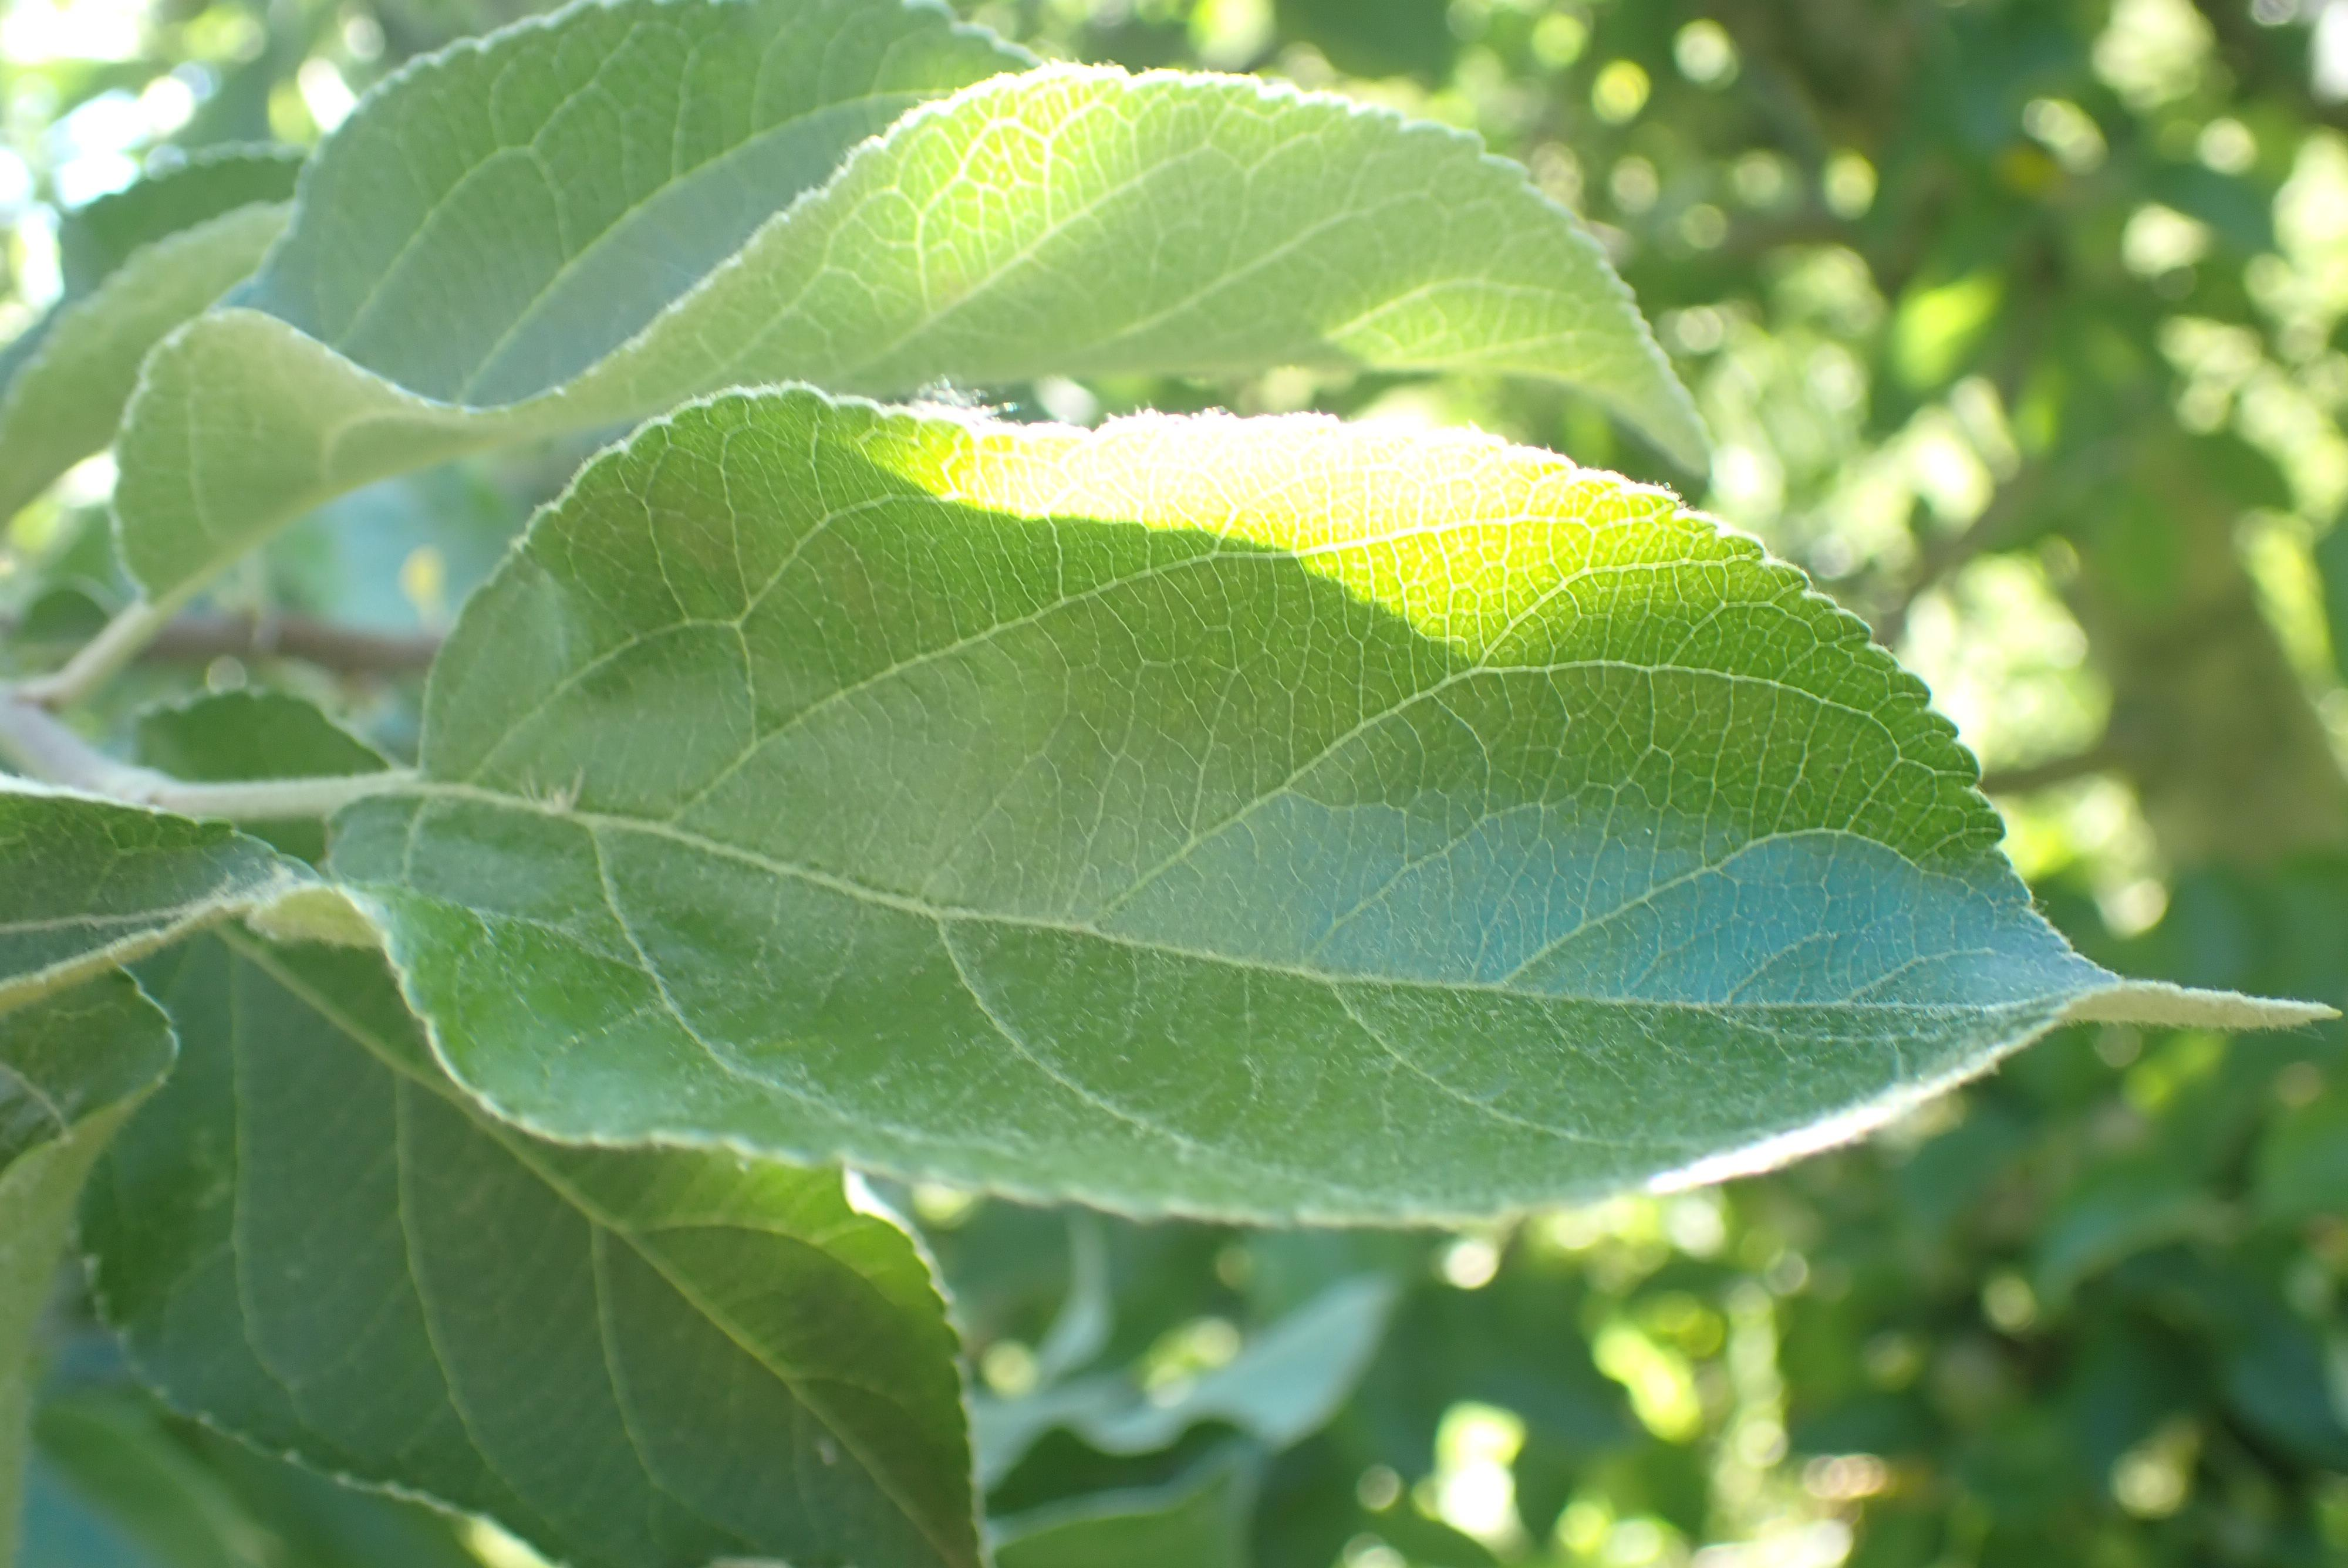

In [5]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\grand\Downloads\Dataset\Train\Train\Healthy\9eea5a4f6d1c9098.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

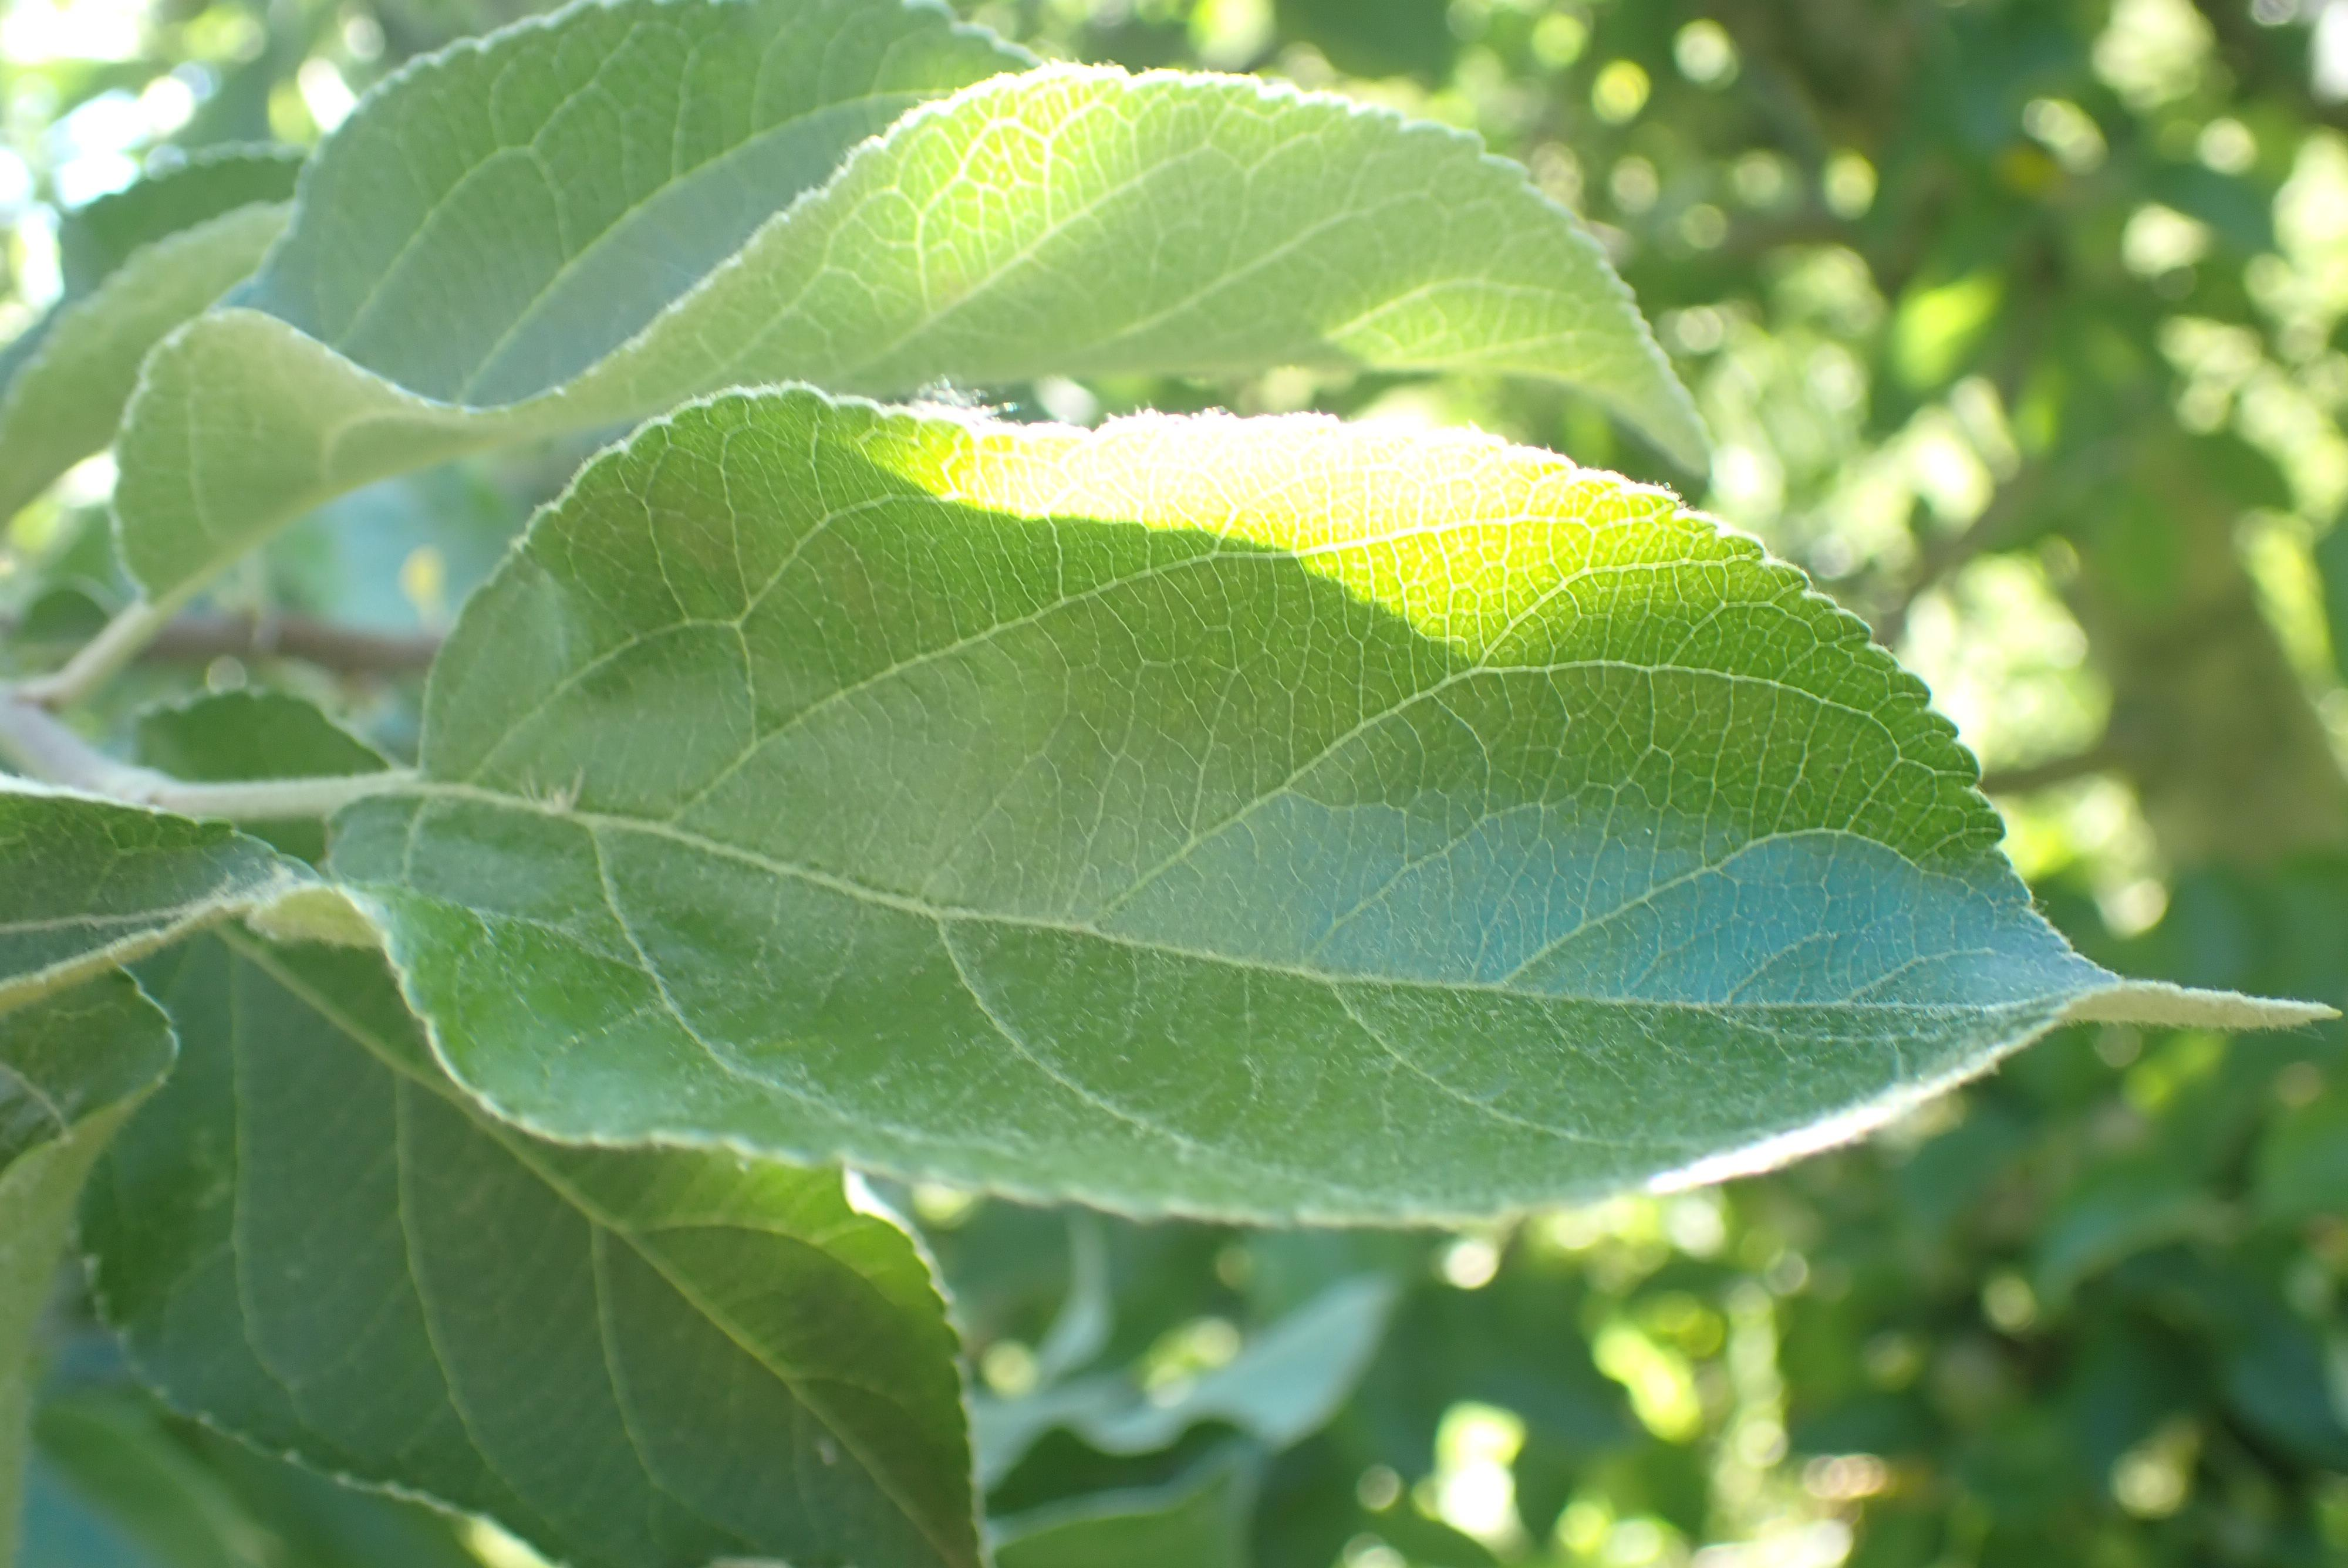

In [6]:
image_path = r"C:\Users\grand\Downloads\Dataset\Train\Train\Healthy\9eea5a4f6d1c9098.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [8]:
! pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)
Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.16.2
    Uninstalling tensorflow-intel-2.16.2:
      Successfully uninstalled tensorflow-intel-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
   

  You can safely remove it manually.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\grand\Downloads\Dataset\Train\Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\grand\Downloads\Dataset\Validation\Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\grand\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN architecture
cnn_model = Sequential()

# Add convolutional layers, pooling layers, and fully connected layers
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))  # Adjust the number of classes as needed

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

C:\Users\grand\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4694 - loss: 3.7503

C:\Users\grand\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4722 - loss: 3.7038 - val_accuracy: 0.7000 - val_loss: 0.5973
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8023 - loss: 0.4837 - val_accuracy: 0.8333 - val_loss: 0.5133
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8844 - loss: 0.3148 - val_accuracy: 0.8000 - val_loss: 0.3908
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9008 - loss: 0.2801 - val_accuracy: 0.8333 - val_loss: 0.4113
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9258 - loss: 0.2325 - val_accuracy: 0.8667 - val_loss: 0.3761


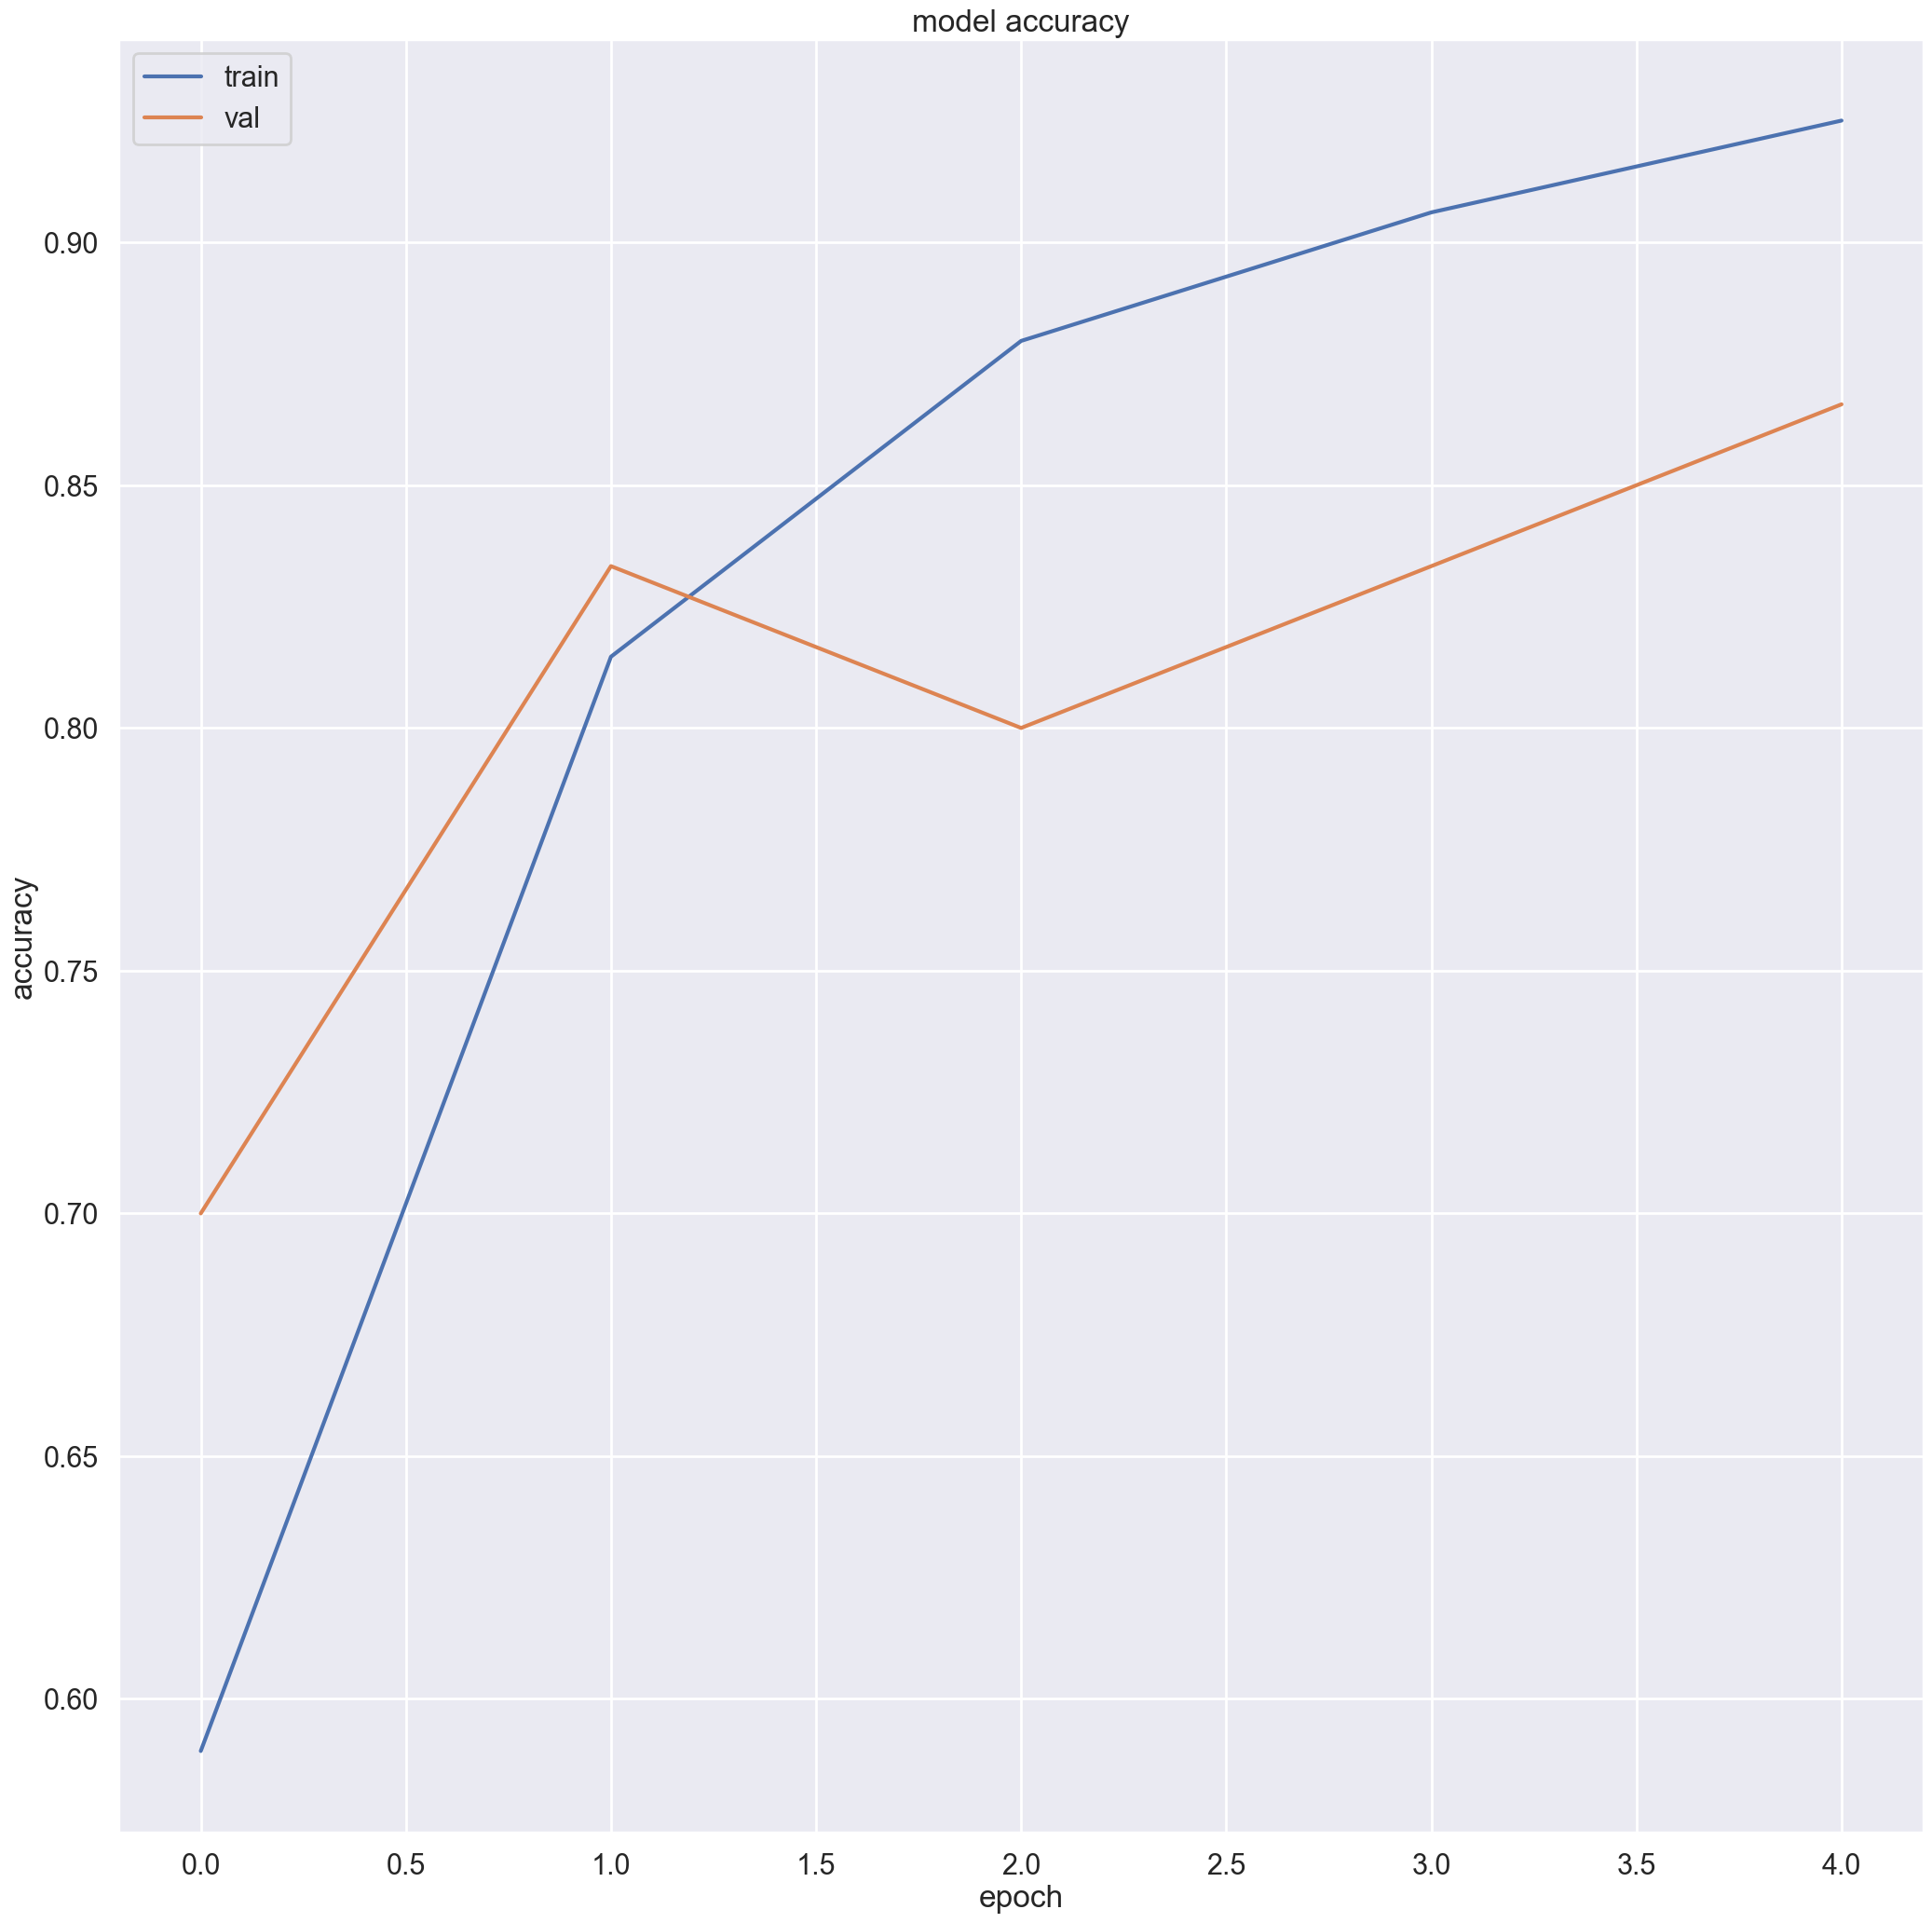

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model.save("model.h5")

In [20]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\grand\Downloads\Dataset\Test\Test\Rust\88e3af0caa9e497c.jpg")

In [21]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


array([4.3251151e-03, 1.2389504e-08, 9.9567491e-01], dtype=float32)

In [22]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [23]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
